# Spherical Gaussian experiment: inference results

## Setup

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging
from mpl_toolkits.mplot3d import Axes3D

sys.path.append("../../")

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [2]:
algo_filenames = [
    "flow",
    "pie",
    "mf",
    "gamf",
    "mf_specified",
    "pie_specified"
]
algo_additionals = [
    "",
    "",
    "",
    "", 
    "", 
    "", 
]
algo_labels = [
    "Flow",
    "PIE",
    "Manifold flow (simple)",
    "GAMF",
    "Specified MF",
    "Specified PIE"
]

setup_filenames = [
    "2_3_0.010",
    "2_3_0.001",
    "2_3_0.100",
]


In [3]:
result_dir = "../data/results"

true_posterior_samples = []
model_posterior_samples = []
mmds = []

for algo_filename in algo_filenames:
    true_posterior_samples_ = []
    model_posterior_samples_ = []
    mmds_ = []
    for setup_filename in setup_filenames:
        try:
            true_posterior_samples_.append(np.load(
                "{}/{}_2_conditional_spherical_gaussian_{}_true_posterior_samples.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except FileNotFoundError as e:
            print(e)
            true_posterior_samples_.append(np.nan*np.ones((1000,2)))
            
        try:
            model_posterior_samples_.append(np.load(
                "{}/{}_2_conditional_spherical_gaussian_{}_model_posterior_samples.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except FileNotFoundError as e:
            print(e)
            model_posterior_samples_.append(np.nan*np.ones((1000,2)))
            
        try:
            mmds_.append(np.load(
                "{}/{}_2_conditional_spherical_gaussian_{}_mmd.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except:
            mmds_.append(np.nan*np.ones((1,)))
            
    true_posterior_samples.append(true_posterior_samples_)
    model_posterior_samples.append(model_posterior_samples_)
    mmds.append(mmds_)
    
true_posterior_samples = np.asarray(true_posterior_samples)
model_posterior_samples = np.asarray(model_posterior_samples)
mmds = np.asarray(mmds)


[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.010_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.010_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.001_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.001_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.100_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.100_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/pie_specified_2_conditional_spherical_gaussian_2_3_0.010_true_posterior_samples.npy'
[Errno 2] No such file or dire

## Plot samples

In [4]:
n = 1000

filename = "../data/samples/conditional_spherical_gaussian/conditional_spherical_gaussian_2_3_0.010_{}.npy"
x_train = np.load(filename.format("x_train"))[:n]
params_train = np.load(filename.format("parameters_train"))[:n]
x_test = np.load(filename.format("x_test"))[:n]
    

<IPython.core.display.Javascript object>


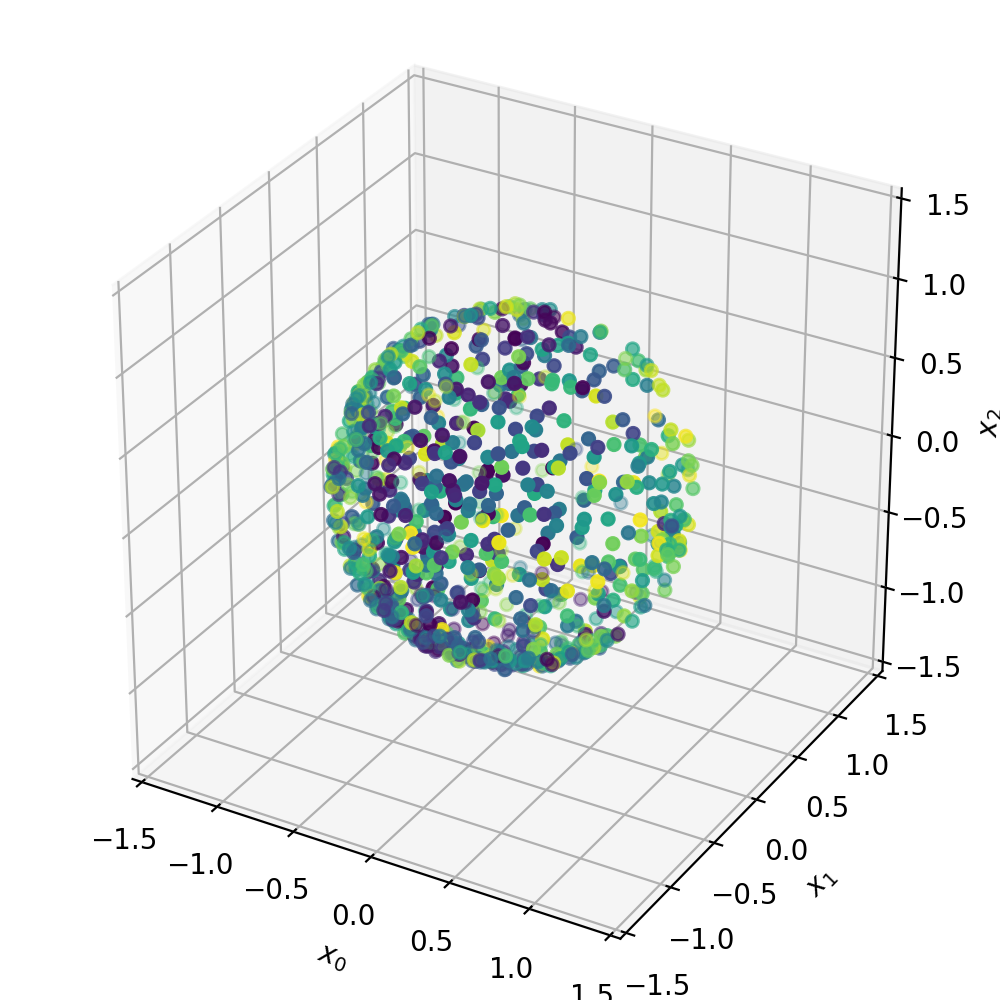

In [7]:
boundary = 1.5

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=params_train[:,0], cmap="viridis")

ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)
ax.set_zlim(-boundary, boundary)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_2$")
    
plt.show()

<IPython.core.display.Javascript object>


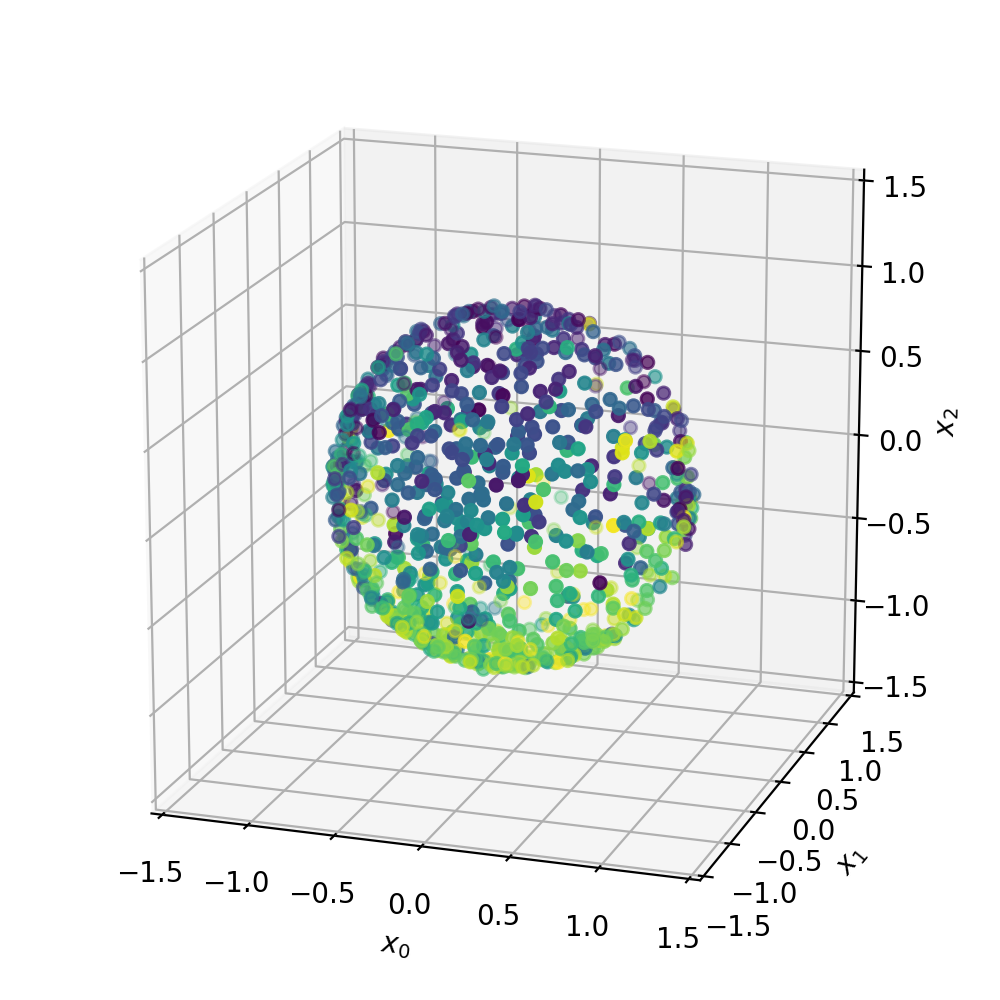

In [6]:
boundary = 1.5

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=params_train[:,1], cmap="viridis")

ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)
ax.set_zlim(-boundary, boundary)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_2$")
    
plt.show()

<IPython.core.display.Javascript object>


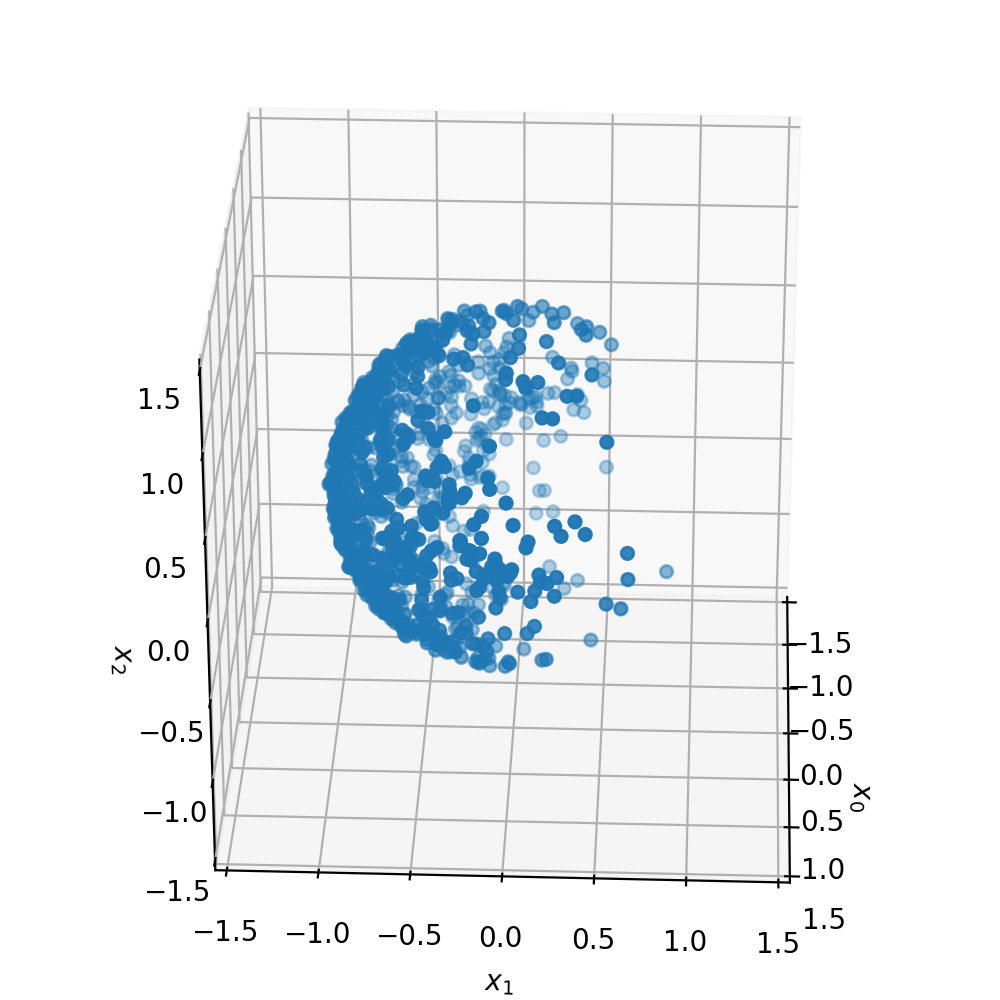

In [8]:
boundary = 1.5

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

ax.scatter(x_test[:,0], x_test[:,1], x_test[:,2])

ax.set_xlim(-boundary, boundary)
ax.set_ylim(-boundary, boundary)
ax.set_zlim(-boundary, boundary)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_2$")
    
plt.show()

## Plot results

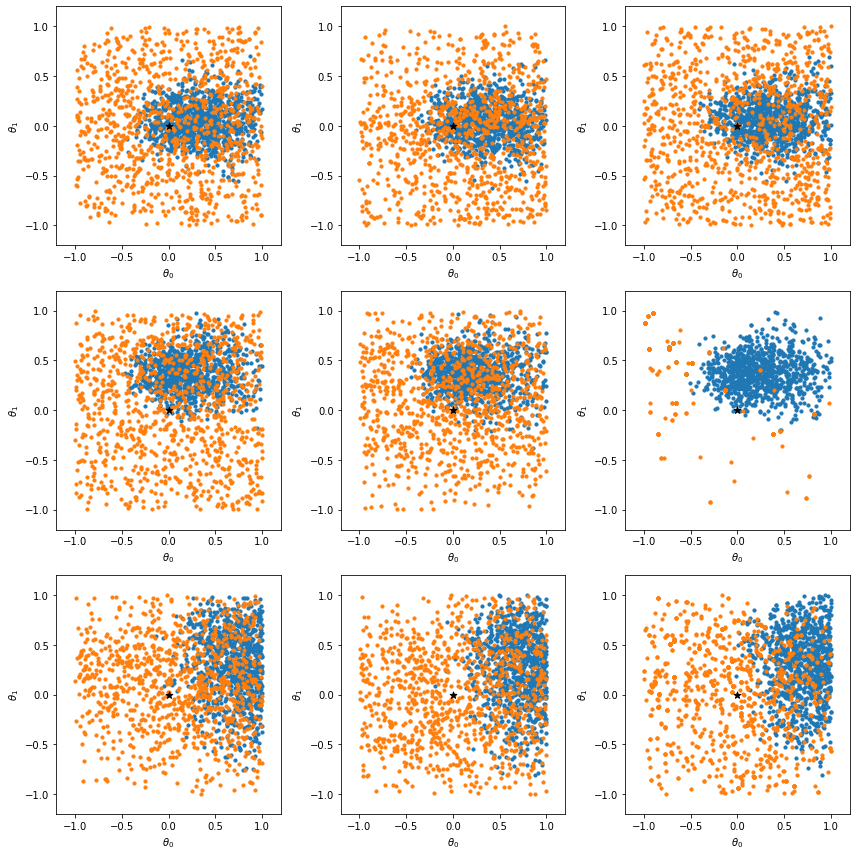

In [10]:
show = [1,0,2]
ncols = 3
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for row, setting in enumerate(show):
    for col, algo in enumerate(range(3)):
        ax = plt.subplot(nrows, ncols, setting*ncols + algo + 1)

        plt.scatter(true_posterior_samples[algo, setting,:,0], true_posterior_samples[algo, setting,:,1], s=10., c="C0")
        plt.scatter(model_posterior_samples[algo, setting,:,0], model_posterior_samples[algo, setting,:,1], s=10., c="C1")
        plt.scatter([0.], [0.], s=50, marker="*", c="black")

        plt.xlabel(r"$\theta_0$")
        plt.ylabel(r"$\theta_1$")
        plt.xlim(-1.2,1.2)
        plt.ylim(-1.2,1.2)
    
plt.tight_layout()
plt.savefig("../figures/posterior_samples_csg.pdf")


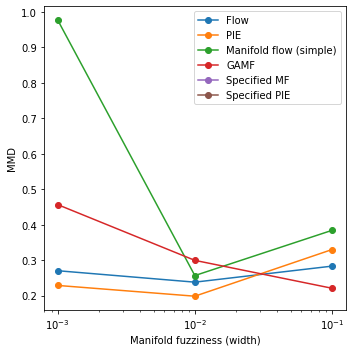

In [11]:
show = [1, 0, 2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(5,5))

for mmds_, algo_label in zip(mmds, algo_labels):
    plt.plot(xs, mmds_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("MMD")

plt.tight_layout()
plt.savefig("../figures/mmd_vs_epsilon_csg.pdf")

